In [1]:
import warnings

warnings.simplefilter("ignore")
import numpy as np

np.seterr(all="ignore")

# %%capture
import matplotlib.pyplot as plt
from pathlib import Path
from threeML import *
from threeML.io.package_data import get_path_of_data_file

# we will need XPSEC models for extinction
from astromodels.xspec import *
from astromodels.xspec.xspec_settings import *

from jupyterthemes import jtplot

%matplotlib inline
jtplot.style(context="talk", fscale=1, ticks=True, grid=False)
set_threeML_style()
silence_warnings()

23:06:19 WARNING   The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it  ]8;id=425293;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=830008;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#69\69]8;;\
                  will not be available.                                                                           

23:06:20 INFO      Starting 3ML!                                                                     ]8;id=616131;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=360012;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/__init__.py#39\39]8;;\

         WARNING   WARNINGs here are NOT errors                                                      ]8;id=31967;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=132675;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/__init__.py#40\40]8;;\

         WARNING   but are inform you about optional packages that can be installed                  ]8;id=964422;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=705018;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/__init__.py#41\41]8;;\

         WARNING    to disable these messages, turn off start_warning in your config file            ]8;id=958866;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=41039;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/__init__.py#44\44]8;;\

23:06:20 WARNING   ROOT minimizer not available                                                ]8;id=972185;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=530447;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/minimizer/minimization.py#1345\1345]8;;\

         WARNING   Multinest minimizer not available                                           ]8;id=152360;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=390906;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/minimizer/minimization.py#1357\1357]8;;\

         WARNING   The cthreeML package is not installed. You will not be able to use plugins which  ]8;id=564244;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=379344;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/__init__.py#94\94]8;;\
                  require the C/C++ interface (currently HAWC)                                                     

         WARNING   Could not import plugin HAWCLike.py. Do you have the relative instrument         ]8;id=912833;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=2372;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/__init__.py#144\144]8;;\
                  software installed and configured?                                                               

Loading xspec models...done


In [33]:
dir = '/home/arpan-john/Desktop/cans/SGRC_bn150426958/current'

import os
import glob
from Calculating_det_angles import estimate_source_angles_detectors  # Importing ma'am's function
from astropy.io import fits

# Finding Trigdat file
trig_string = "_trigdat_"
trig_pattern = os.path.join(dir, f"*{trig_string}*")
trigdat_file = glob.glob(trig_pattern)

print(trigdat_file)

for s in trigdat_file[0].split('_'):
    if 'bn' in s:
        trigger = s
        break
print(trigger)

# Getting the RA and DEC
with fits.open(trigdat_file[0], memmap=True) as pha_list:
    ra_obj, dec_obj = (pha_list[0].header['RA_OBJ']), (pha_list[0].header['DEC_OBJ'])

brightest_nai, bright_nais, brightest_bgo = estimate_source_angles_detectors.angle_to_grb(ra_obj, dec_obj,trigdat_file[0])

print(brightest_nai)
print(bright_nais)
print(brightest_bgo)

# Finding TTE files
tte_string = "_tte_"
tte_pattern = os.path.join(dir, f"*{tte_string}*")
tte_files = glob.glob(tte_pattern)
tte_files.sort()
print(tte_files)

# Finding rsp files
rsp_string = ".rsp"
rsp_pattern = os.path.join(dir, f"*{rsp_string}*")
rsp_files = glob.glob(rsp_pattern)

for file in rsp_files:
    if 'ctime' in file:
        rsp_files.remove(file)
        continue
    if 'ctime' in file.split('_'):
        rsp_files.remove(file)
        
rsp_files.sort()
print(rsp_files)


['/home/arpan-john/Desktop/cans/SGRC_bn150426958/current/glg_trigdat_all_bn150426958_v01.fit']
bn150426958/current/glg
 
The brightest NaI detector is n6 - Source angle is: 10 deg
The brightest 3 NaI detectors are n6 ( 10 deg) n7 ( 34 deg) n9 ( 40 deg)
The brightest BGO detector is b1 ( 76 deg )
n6
['n6', 'n7', 'n9']
['b1']
['/home/arpan-john/Desktop/cans/SGRC_bn150426958/current/glg_tte_b0_bn150426958_v00.fit', '/home/arpan-john/Desktop/cans/SGRC_bn150426958/current/glg_tte_b1_bn150426958_v00.fit', '/home/arpan-john/Desktop/cans/SGRC_bn150426958/current/glg_tte_n0_bn150426958_v00.fit', '/home/arpan-john/Desktop/cans/SGRC_bn150426958/current/glg_tte_n1_bn150426958_v00.fit', '/home/arpan-john/Desktop/cans/SGRC_bn150426958/current/glg_tte_n2_bn150426958_v00.fit', '/home/arpan-john/Desktop/cans/SGRC_bn150426958/current/glg_tte_n3_bn150426958_v00.fit', '/home/arpan-john/Desktop/cans/SGRC_bn150426958/current/glg_tte_n4_bn150426958_v00.fit', '/home/arpan-john/Desktop/cans/SGRC_bn150426958/cu

In [36]:
NaI_detectors = []
rsp_NaI_files = []
rsp2_NaI_files = []
for nai in bright_nais:
    for file in rsp_files:
        if 'ctime' in file:
            rsp_files.remove(file)
            continue
        elif brightest_bgo[0] in file and 'rsp2' in file:
            rsp2_BGO_file = [file]
            continue
        elif brightest_bgo[0] in file and 'rsp' in file:
            rsp_BGO_file = [file]
            continue
        elif nai in file and 'rsp2' in file:
            rsp2_NaI_files.append(file)
            continue
        elif nai in file and 'rsp' in file:
            rsp_NaI_files.append(file)
    for file in tte_files:
        if brightest_bgo[0] in file:
            BGO_detector = [file]
        if nai in file:
            NaI_detectors.append(file)
            break

# NaI_detectors =  NaI_detectors[0:2]
# rsp_NaI_files =  rsp_NaI_files[0:2]
# rsp2_NaI_files = rsp2_NaI_files[0:2]

print(NaI_detectors)
print(BGO_detector)
print(rsp_NaI_files)
print(rsp2_NaI_files)
print(rsp_BGO_file)
try:
    print(rsp2_BGO_file)
except:
    print('no rsp2 file')

tte_file = NaI_detectors[0]
with fits.open(tte_file, memmap=True) as hdul:
    all_count_data = hdul[2].data
    trigtime = hdul[2].header['TRIGTIME']

counts = all_count_data['TIME'].astype(float) - trigtime
cmin = counts.min()
cmax = counts.max()
print(f"Earliest count {cmin:.2f}, latest count {cmax:.2f}")

['/home/arpan-john/Desktop/cans/SGRC_bn150426958/current/glg_tte_n6_bn150426958_v00.fit', '/home/arpan-john/Desktop/cans/SGRC_bn150426958/current/glg_tte_n7_bn150426958_v00.fit', '/home/arpan-john/Desktop/cans/SGRC_bn150426958/current/glg_tte_n9_bn150426958_v00.fit']
['/home/arpan-john/Desktop/cans/SGRC_bn150426958/current/glg_tte_b1_bn150426958_v00.fit']
['/home/arpan-john/Desktop/cans/SGRC_bn150426958/current/glg_cspec_n6_bn150426958_v01.rsp', '/home/arpan-john/Desktop/cans/SGRC_bn150426958/current/glg_cspec_n7_bn150426958_v01.rsp', '/home/arpan-john/Desktop/cans/SGRC_bn150426958/current/glg_cspec_n9_bn150426958_v01.rsp']
[]
['/home/arpan-john/Desktop/cans/SGRC_bn150426958/current/glg_cspec_b1_bn150426958_v01.rsp']
['/home/arpan-john/Desktop/cans/GRBC_bn240323372/current/glg_cspec_b1_bn240323372_v01.rsp2']
Earliest count -136.19, latest count 478.21


In [39]:
# set background interval
background_interval = ["-100 - -20","20 - 400"]

Finding best polynomial Order:   0%|          | 0/4 [00:00<?, ?it/s]

23:36:44 INFO      Auto-determined polynomial order: 3                                            ]8;id=923931;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/utils/time_series/event_list.py\event_list.py]8;;\:]8;id=440609;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/utils/time_series/event_list.py#538\538]8;;\

Fitting GBM_NAI_07 background:   0%|          | 0/128 [00:00<?, ?it/s]

23:36:55 INFO      None 3-order polynomial fit with the mle method                               ]8;id=627284;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/utils/time_series/time_series.py\time_series.py]8;;\:]8;id=51141;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/utils/time_series/time_series.py#458\458]8;;\

         INFO      Created 601 bins via constant                                         ]8;id=327645;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=232014;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/utils/data_builders/time_series_builder.py#708\708]8;;\

1834 3.7663603704396684 time interval -48.12706799364082 - -47.10306799364082 (duration: 1.024000000000001)
-48.12706799364082
-47.10306799364082
time interval 1.024000000000001
may be a short GRB
[-48.12706799364082, -47.10306799364082]


23:36:59 INFO      Interval set to -2.5-5.0 for temp                                     ]8;id=626012;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=149805;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/utils/data_builders/time_series_builder.py#290\290]8;;\

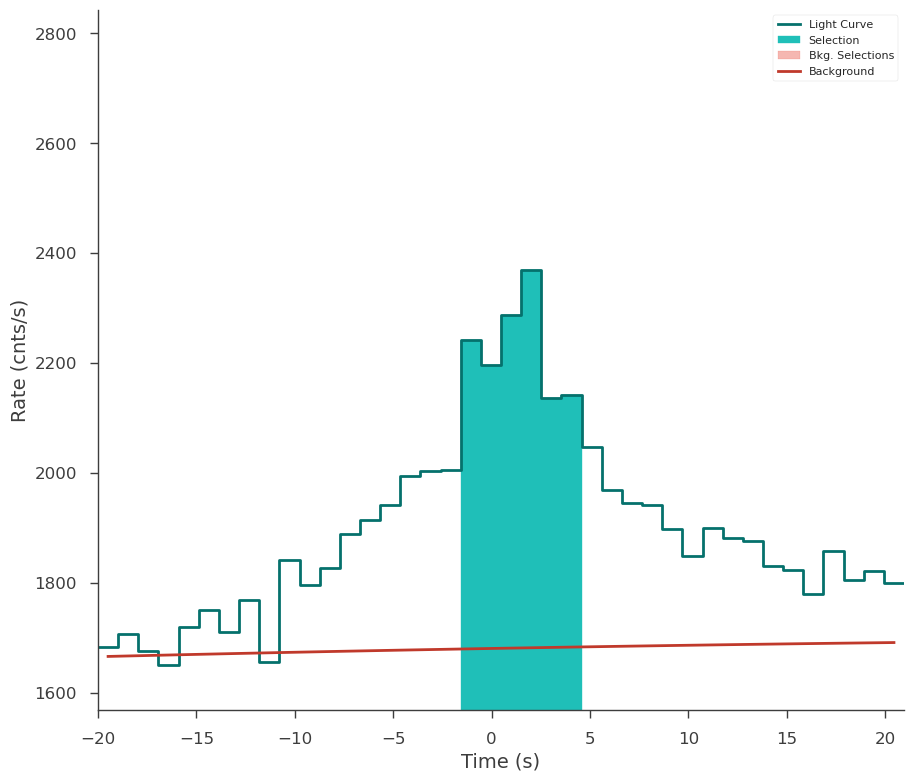

In [47]:
def find_act_inv(ts,cmin=cmin,cmax=cmax,type = 'long'):

    if type == 'long':
        dt = 1.024
    else:
        dt = 0.064
    ts.create_time_bins(start=cmin, stop=cmax, method='constant',dt = dt)
    skip = 0
    flag = 0
    for sig,tot,bins in zip (ts.significance_per_interval[skip:],ts.total_counts_per_interval[skip:],ts.bins[skip:]):
        if sig > 3.5:
            print(tot,sig,bins)        
        bins = str(bins)
        if sig > 3.5 and flag == 0:
            start = float(bins.split(' ')[2])
            flag = 1
        if sig < 3.5 and flag == 1:
            stop = float(bins.split(' ')[2])
            break
    print(start)
    print(stop)
    print('time interval', stop - start)
    if (stop - start) < 2 and type == 'long':
        print('may be a short GRB')
    return start,stop


temp_ts = TimeSeriesBuilder.from_gbm_tte(
        'temp', 
        tte_file=NaI_detectors[1], 
        rsp_file=rsp_NaI_files[1])
temp_ts.set_background_interval(*background_interval)
start , stop = find_act_inv(temp_ts)
print([start, stop])
# set interval
source_interval = f'{start:.2f} - {stop:.2f}'
source_tuple = (start,stop)
# temp_ts.set_active_time_interval(source_interval)
temp_ts.set_active_time_interval('-2.5 - 5')
fig = temp_ts.view_lightcurve(-20, 20, dt = 1.024)
# fig = temp_ts.view_lightcurve(cmin+1, cmax-1, dt = 1)


detector n6


Finding best polynomial Order:   0%|          | 0/4 [00:00<?, ?it/s]

23:41:08 INFO      Auto-determined polynomial order: 3                                            ]8;id=396991;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/utils/time_series/event_list.py\event_list.py]8;;\:]8;id=156877;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/utils/time_series/event_list.py#538\538]8;;\

Fitting GBM_NAI_06 background:   0%|          | 0/128 [00:00<?, ?it/s]

23:41:19 INFO      None 3-order polynomial fit with the mle method                               ]8;id=889833;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/utils/time_series/time_series.py\time_series.py]8;;\:]8;id=773414;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/utils/time_series/time_series.py#458\458]8;;\

         INFO      Created 69 bins via constant                                          ]8;id=103147;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=647029;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/utils/data_builders/time_series_builder.py#708\708]8;;\

         INFO      Interval set to -2.5-5.0 for n6                                       ]8;id=509195;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=815792;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/utils/data_builders/time_series_builder.py#290\290]8;;\

         INFO      Auto-probed noise models:                                                    ]8;id=244941;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=563745;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py#490\490]8;;\

         INFO      - observation: poisson                                                       ]8;id=721322;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=600867;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py#491\491]8;;\

         INFO      - background: gaussian                                                       ]8;id=672487;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=774974;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py#492\492]8;;\

         INFO      Range 9-900 translates to channels 3-123                                    ]8;id=488271;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=281157;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py#1247\1247]8;;\

         INFO      Now using 121 bins                                                          ]8;id=97355;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=555915;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py#1739\1739]8;;\

detector n7


Finding best polynomial Order:   0%|          | 0/4 [00:00<?, ?it/s]

23:41:21 INFO      Auto-determined polynomial order: 3                                            ]8;id=541359;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/utils/time_series/event_list.py\event_list.py]8;;\:]8;id=321734;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/utils/time_series/event_list.py#538\538]8;;\

Fitting GBM_NAI_07 background:   0%|          | 0/128 [00:00<?, ?it/s]

23:41:31 INFO      None 3-order polynomial fit with the mle method                               ]8;id=999654;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/utils/time_series/time_series.py\time_series.py]8;;\:]8;id=972737;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/utils/time_series/time_series.py#458\458]8;;\

         INFO      Created 69 bins via constant                                          ]8;id=253544;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=916993;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/utils/data_builders/time_series_builder.py#708\708]8;;\

23:41:32 INFO      Interval set to -2.5-5.0 for n7                                       ]8;id=720326;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=981930;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/utils/data_builders/time_series_builder.py#290\290]8;;\

         INFO      Auto-probed noise models:                                                    ]8;id=861265;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=486097;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py#490\490]8;;\

         INFO      - observation: poisson                                                       ]8;id=304832;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=113185;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py#491\491]8;;\

         INFO      - background: gaussian                                                       ]8;id=887774;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=288953;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py#492\492]8;;\

         INFO      Range 9-900 translates to channels 4-123                                    ]8;id=655648;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=954135;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py#1247\1247]8;;\

         INFO      Now using 120 bins                                                          ]8;id=662669;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=89006;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py#1739\1739]8;;\

detector n9


Finding best polynomial Order:   0%|          | 0/4 [00:00<?, ?it/s]

23:41:33 INFO      Auto-determined polynomial order: 3                                            ]8;id=469244;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/utils/time_series/event_list.py\event_list.py]8;;\:]8;id=65069;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/utils/time_series/event_list.py#538\538]8;;\

Fitting GBM_NAI_09 background:   0%|          | 0/128 [00:00<?, ?it/s]

23:41:44 INFO      None 3-order polynomial fit with the mle method                               ]8;id=654786;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/utils/time_series/time_series.py\time_series.py]8;;\:]8;id=915489;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/utils/time_series/time_series.py#458\458]8;;\

         INFO      Created 69 bins via constant                                          ]8;id=669578;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=688461;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/utils/data_builders/time_series_builder.py#708\708]8;;\

         INFO      Interval set to -2.5-5.0 for n9                                       ]8;id=550049;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=481035;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/utils/data_builders/time_series_builder.py#290\290]8;;\

         INFO      Auto-probed noise models:                                                    ]8;id=903008;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=728816;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py#490\490]8;;\

         INFO      - observation: poisson                                                       ]8;id=324525;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=716867;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py#491\491]8;;\

         INFO      - background: gaussian                                                       ]8;id=415808;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=741675;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py#492\492]8;;\

         INFO      Range 9-900 translates to channels 5-124                                    ]8;id=155008;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=147263;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py#1247\1247]8;;\

         INFO      Now using 120 bins                                                          ]8;id=755979;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=831107;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py#1739\1739]8;;\

detector b1


Finding best polynomial Order:   0%|          | 0/4 [00:00<?, ?it/s]

23:41:46 INFO      Auto-determined polynomial order: 1                                            ]8;id=723196;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/utils/time_series/event_list.py\event_list.py]8;;\:]8;id=610287;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/utils/time_series/event_list.py#538\538]8;;\

Fitting GBM_BGO_01 background:   0%|          | 0/128 [00:00<?, ?it/s]

23:41:54 INFO      None 1-order polynomial fit with the mle method                               ]8;id=700942;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/utils/time_series/time_series.py\time_series.py]8;;\:]8;id=217724;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/utils/time_series/time_series.py#458\458]8;;\

         INFO      Created 69 bins via constant                                          ]8;id=347857;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=553363;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/utils/data_builders/time_series_builder.py#708\708]8;;\

         INFO      Interval set to -2.5-5.0 for b1                                       ]8;id=264901;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=828337;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/utils/data_builders/time_series_builder.py#290\290]8;;\

23:41:55 INFO      Auto-probed noise models:                                                    ]8;id=365550;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=112656;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py#490\490]8;;\

         INFO      - observation: poisson                                                       ]8;id=684724;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=668287;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py#491\491]8;;\

         INFO      - background: gaussian                                                       ]8;id=180720;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=79117;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py#492\492]8;;\

         INFO      Range 250-30000 translates to channels 4-119                                ]8;id=692603;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=918454;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py#1247\1247]8;;\

         INFO      Now using 116 bins                                                          ]8;id=458512;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=265813;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py#1739\1739]8;;\

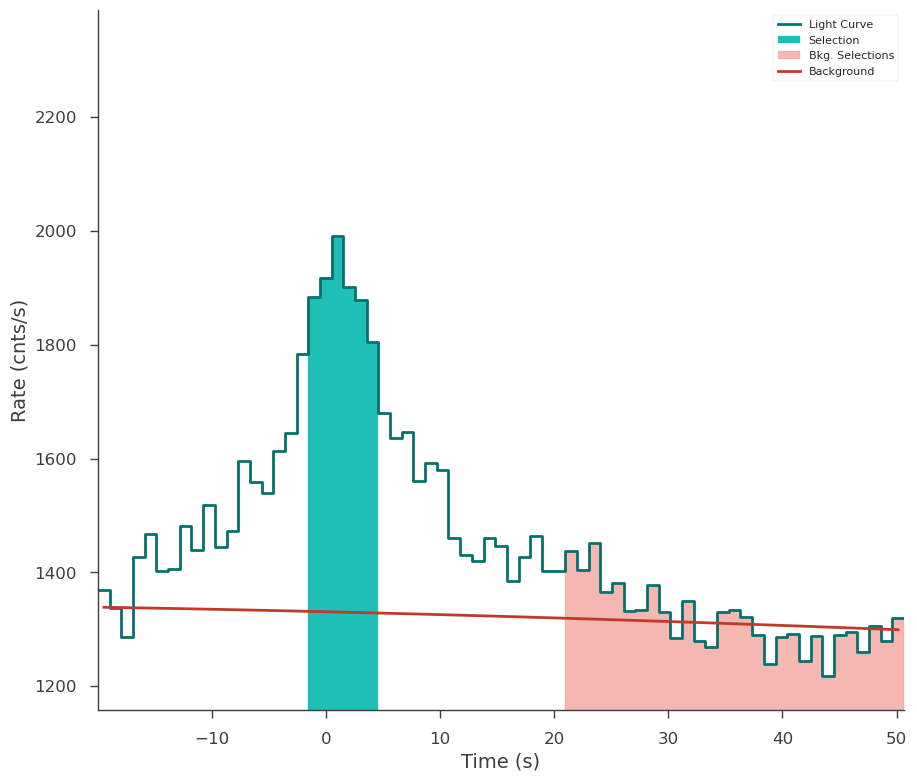

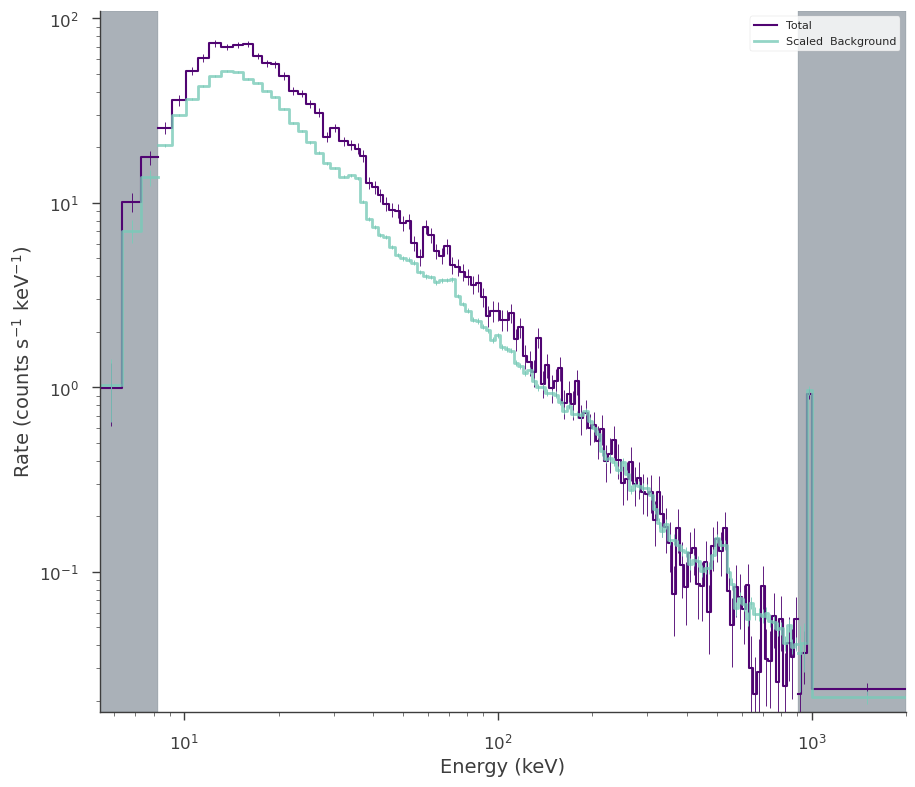

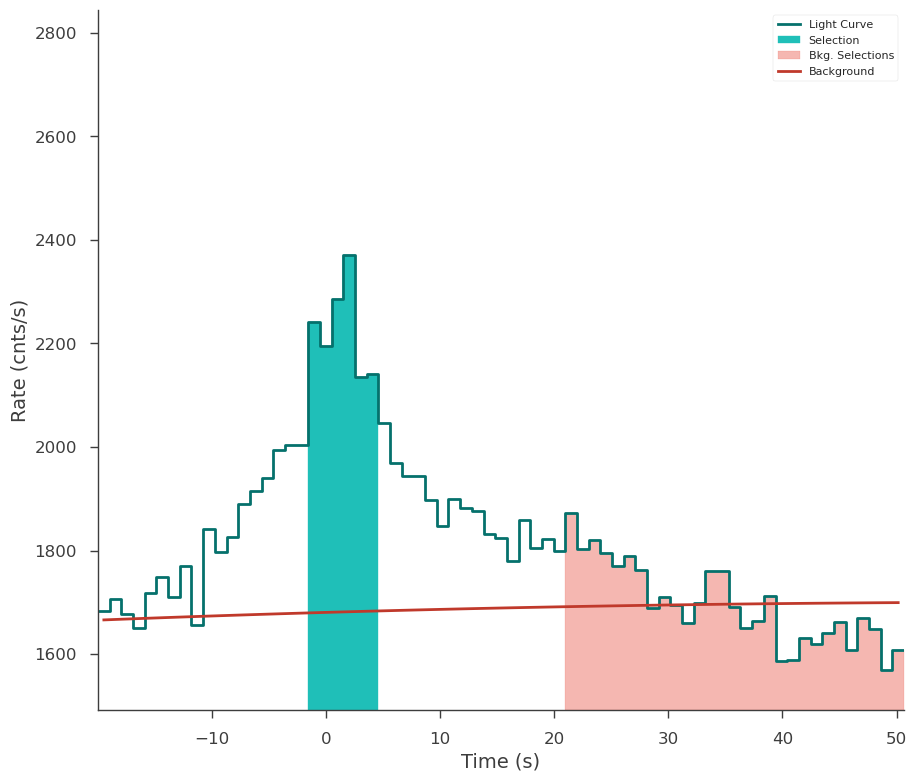

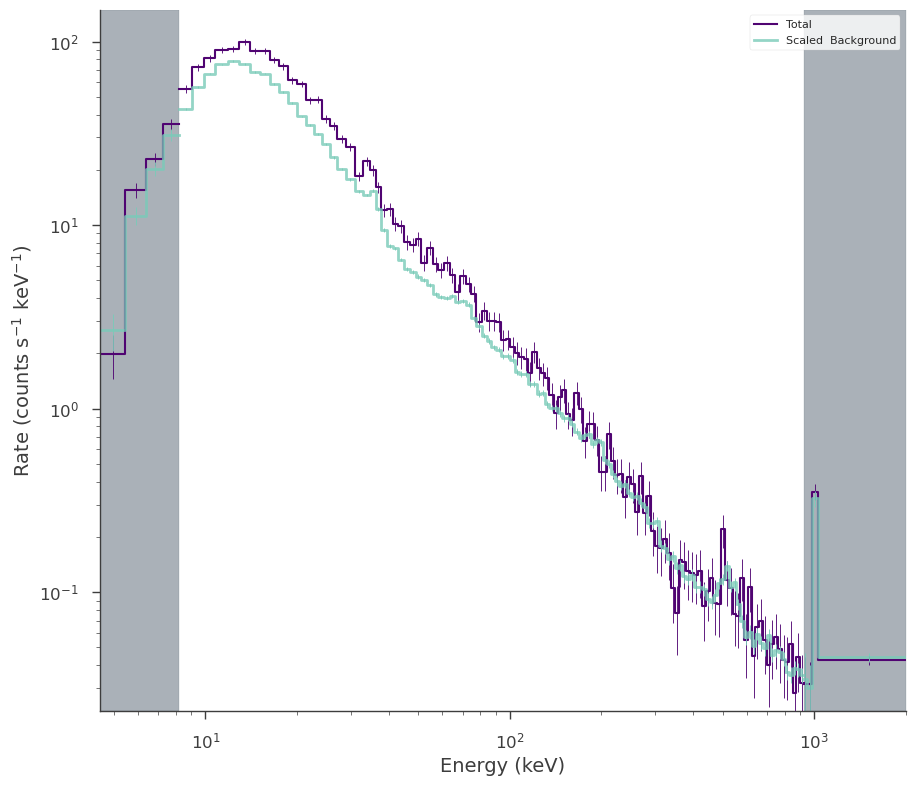

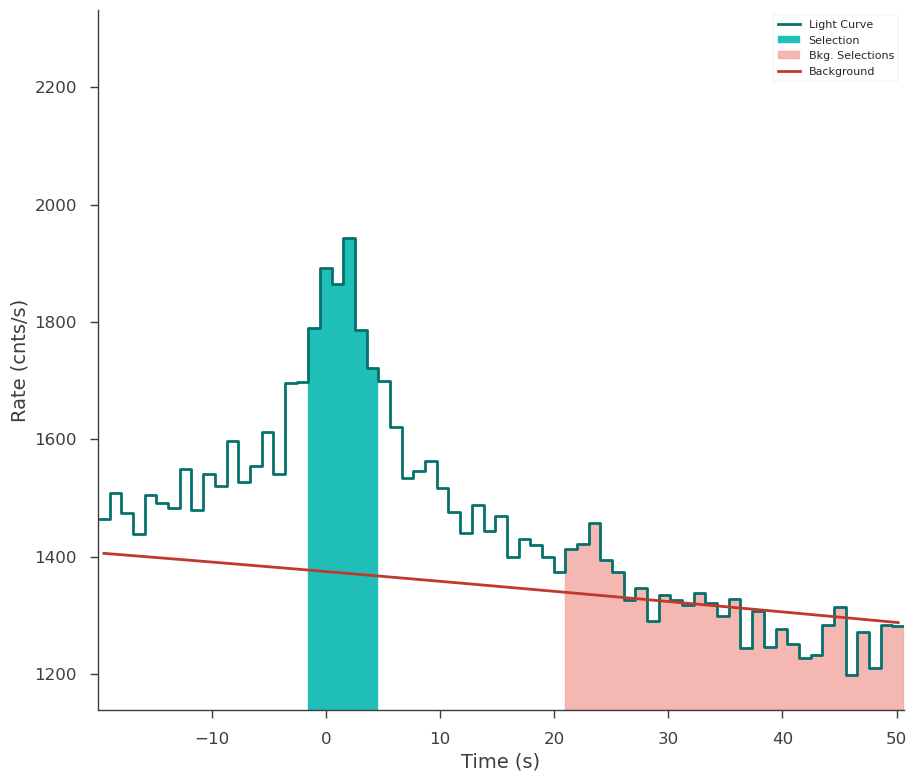

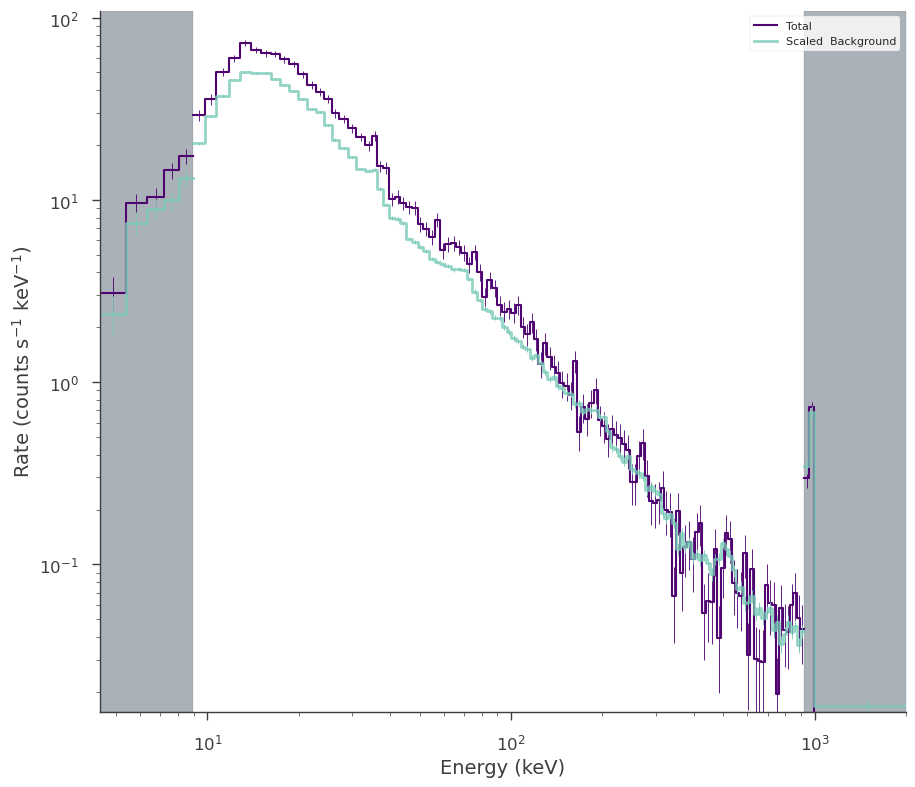

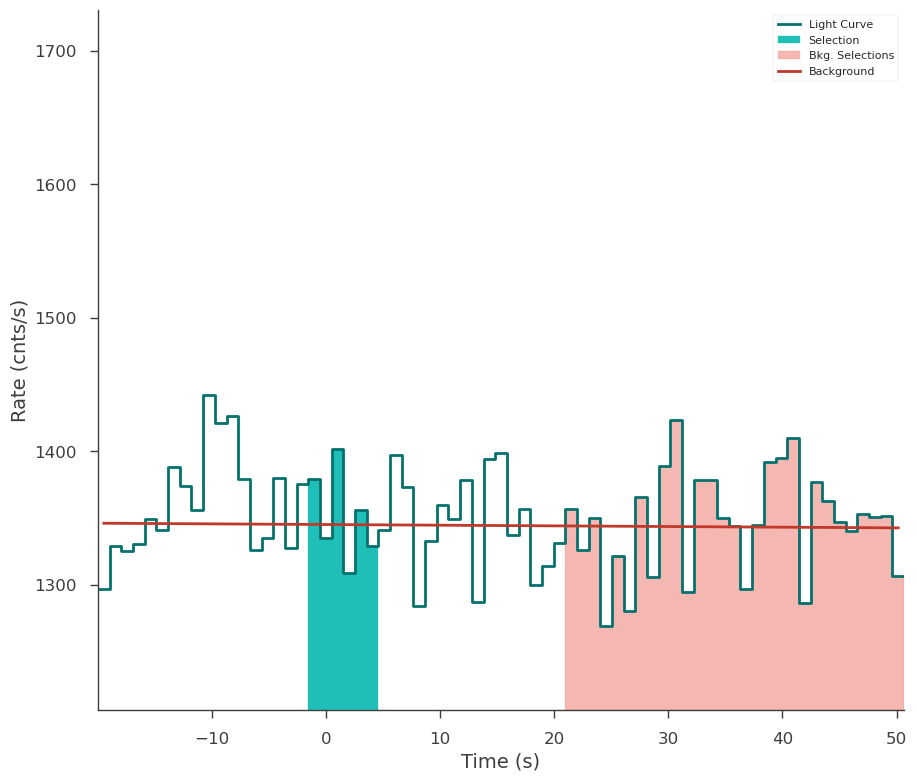

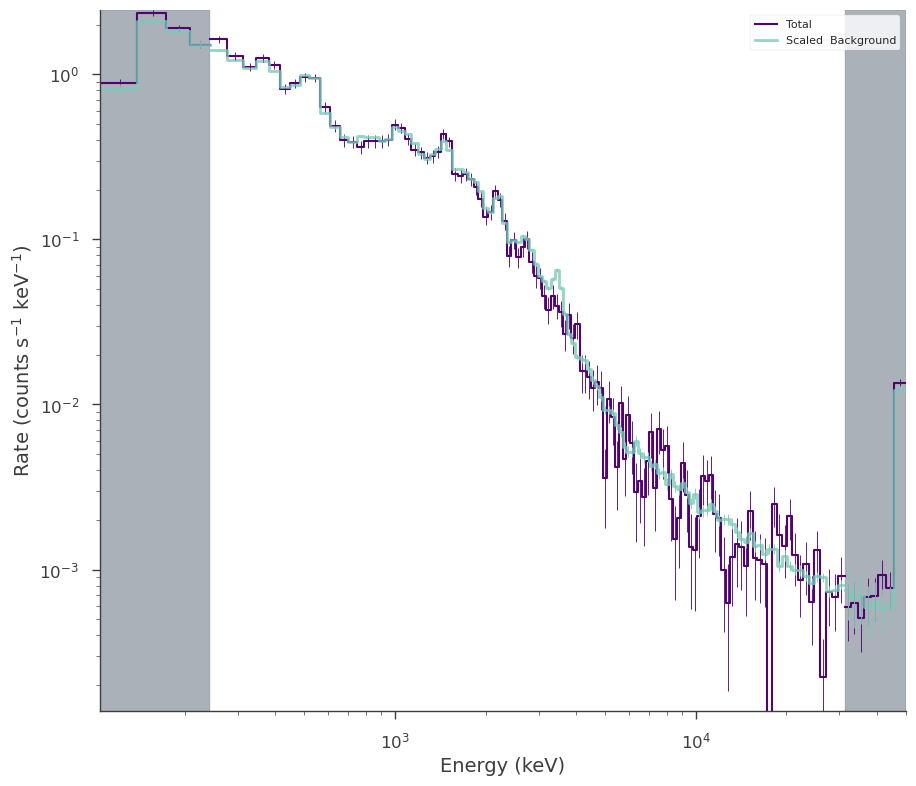

In [50]:
fluence_plugins = []
time_series = {}
for det,rsp in zip((NaI_detectors + BGO_detector),(rsp_NaI_files+rsp_BGO_file)):
    det_name = det.split('_')[-3]
    print('detector',det_name)
    ts = TimeSeriesBuilder.from_gbm_tte(
        det_name, tte_file=det, rsp_file=rsp
    )

    ts.set_background_interval(*background_interval)

    # # Bayes block method
    # ts.create_time_bins(
    #     start=-20.0, stop=50.0, method="bayesblocks", p0=0.01, use_background=True
    # )

    # bad_bins = []
    # for i, w in enumerate(ts.bins.widths):
    #     if w < 5e-2:
    #         bad_bins.append(i)


    # edges = [ts.bins.starts[0]]

    # for i, b in enumerate(ts.bins):
    #     if i not in bad_bins:
    #         edges.append(b.stop)

    # starts = edges[:-1]
    # stops = edges[1:]

    # if len(edges) < 4:
    #     continue

    # # selected_bins = select_bins_containing_interval(edges, source_tuple)
    # # source_interval = f'{edges[selected_bins[0]]:.2f} - {edges[1+selected_bins[-1]]:.2f}'

    # ts.create_time_bins(starts, stops, method="custom")

    dt = 1.024
    ts.create_time_bins(start=-20, stop=50, method='constant',dt = dt)

    time_series[det_name] = ts

    # ts.set_active_time_interval(source_interval)
    ts.set_active_time_interval('-2.5 - 5')

    fig = ts.view_lightcurve(-20, 20,use_binner = True)

    fluence_plugin = ts.to_spectrumlike()

    if det_name.startswith("b"):
        fluence_plugin.set_active_measurements("250-30000")

    else:
        fluence_plugin.set_active_measurements("9-900")

    fluence_plugin.rebin_on_background(1.0)

    fig = fluence_plugin.view_count_spectrum()

    fluence_plugins.append(fluence_plugin)

In [43]:
print(gg)

NameError: name 'gg' is not defined

In [65]:
XS_zbremss()

* description: The zbremss model from XSpec (https://heasarc.gsfc.nasa.gov/xanadu/xspec/manual/XspecModels.html)
  * formula: $n.a.$
  * parameters:
    * kt:
      * value: 7.0
      * desc: (see https://heasarc.gsfc.nasa.gov/xanadu/xspec/manual/XspecModels.html)
      * min_value: 0.0001
      * max_value: 200.0
      * unit: keV
      * is_normalization: false
      * delta: 0.05
      * free: true
    * redshift:
      * value: 0.0
      * desc: (see https://heasarc.gsfc.nasa.gov/xanadu/xspec/manual/XspecModels.html)
      * min_value: -0.999
      * max_value: 10.0
      * unit: ''
      * is_normalization: false
      * delta: 0.01
      * free: true
    * norm:
      * value: 1.0
      * desc: (see https://heasarc.gsfc.nasa.gov/xanadu/xspec/manual/XspecModels.html)
      * min_value: 0.0
      * max_value: null
      * unit: keV s-1 cm-2
      * is_normalization: false
      * delta: 0.1
      * free: true

In [101]:
xspec_abund("angr")

# spectral_model = XS_phabs() * XS_zphabs() * Powerlaw()# SmoothlyBrokenPowerLaw  # Band _grbm() # #  
# spectral_model = XS_grbm()
# spectral_model = XS_zbremss(kt = 25, redshift = 5, norm = 10)
spectral_model = XS_bremss()

ptsrc = PointSource(trigger.split('/')[0], ra_obj, dec_obj, spectral_shape=spectral_model)
model = Model(ptsrc)

data = DataList(*fluence_plugins[:-1])
# data = DataList(fluence_plugins[0])

jl = JointLikelihood(model, data, verbose=False)
model.display()

 Solar Abundance Vector set to angr:  Anders E. & Grevesse N. Geochimica et Cosmochimica Acta 53, 197 (1989)


00:21:50 INFO      set the minimizer to minuit                                             ]8;id=440762;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=27492;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1045\1045]8;;\

Model summary:
==============

                  N
Point sources     1
Extended sources  0
Particle sources  0

Free parameters (2):
--------------------

                                         value min_value max_value  \
bn150426958.spectrum.main.XS_bremss.kt     7.0    0.0001     200.0   
bn150426958.spectrum.main.XS_bremss.norm   1.0       0.0      None   

                                                  unit  
bn150426958.spectrum.main.XS_bremss.kt             keV  
bn150426958.spectrum.main.XS_bremss.norm  keV s-1 cm-2  

Fixed parameters (5):
(abridged. Use complete=True to see all fixed parameters)


Properties (0):
--------------------

(none)


Linked parameters (0):
----------------------

(none)

Independent variables:
----------------------

(none)

Linked functions (0):
----------------------

(none)

In [102]:
# statistical measures 
# AIC	smaller is better
# BIC	smaller is better 
# Goodness of fit (p-value:) larger is better (I think)

Best fit values:

,result,unit
parameter,,
bn150426958.spectrum.main.XS_bremss.kt,(5.92 +/- 0.29) x 10,keV
bn150426958.spectrum.main.XS_bremss.norm,(2.26 +/- 0.06) x 10,keV / (s cm2)


Correlation matrix:

1.00,-0.76
-0.76,1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
n6,560.897129
n7,562.406303
n9,553.462637
total,1676.766070


Values of statistical measures:

,statistical measures
AIC,3357.565659
BIC,3365.309895


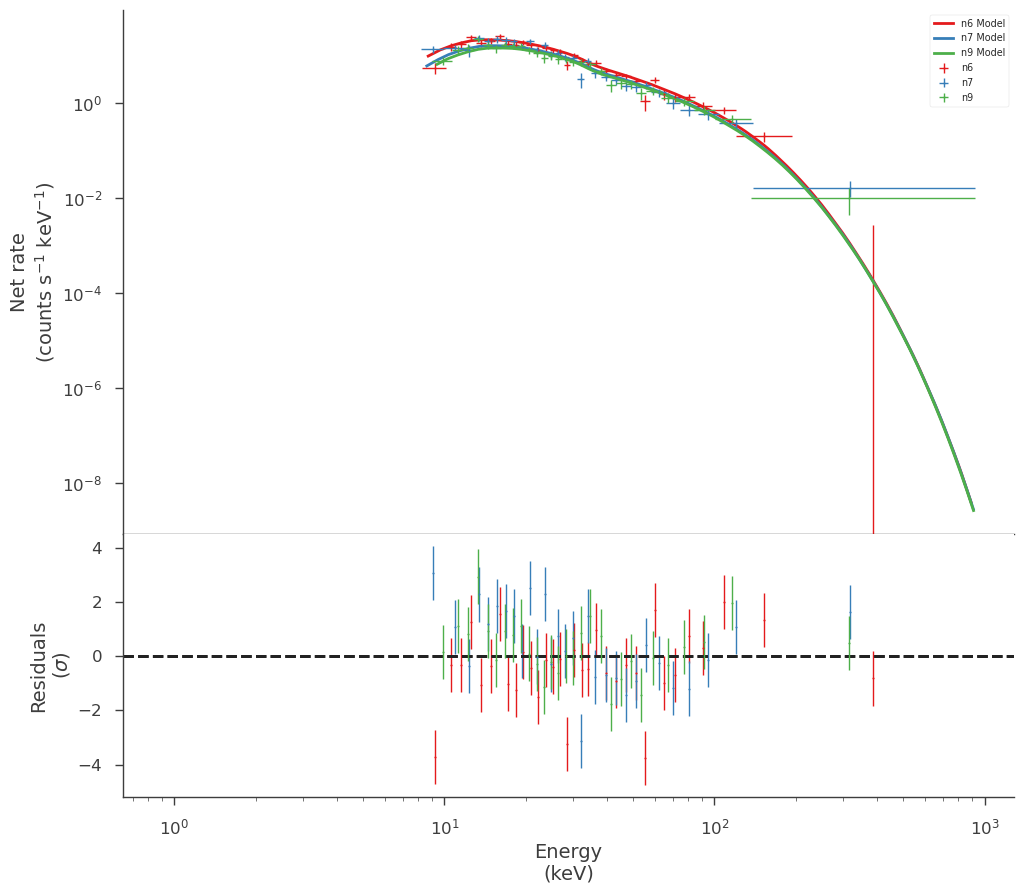

In [103]:
res = jl.fit()
fig = display_spectrum_model_counts(jl, min_rate = [10,10,10])

In [105]:
gof_obj = GoodnessOfFit(jl)

gof, data_frame, like_data_frame = gof_obj.by_mc(
    n_iterations=500, continue_on_failure=True
)

print(gof)

Goodness of fit computation:   0%|          | 0/500 [00:00<?, ?it/s]

OrderedDict([('total', 0.012), ('n6', 0.146), ('n7', 0.094), ('n9', 0.084)])


In [106]:
like_df = res[1]
param_df = res[0]

Goodness of fit (p-value:) 0.012
Meaning that 1.2% of simulations have a larger (worse) likelihood
and 98.8% of simulations have a smaller (better) likelihood than seen in data


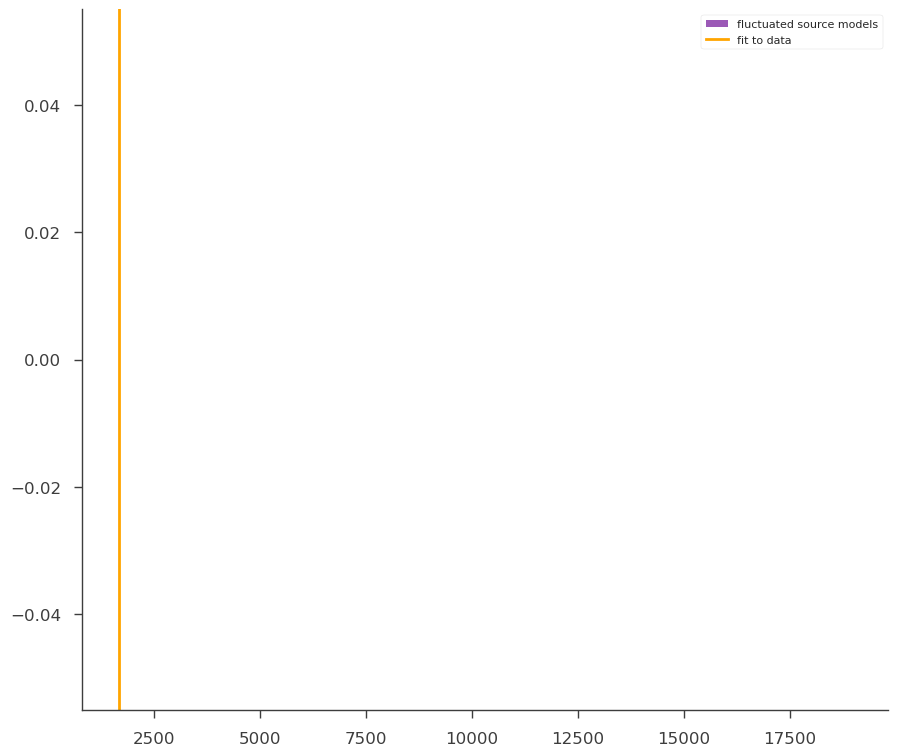

In [107]:
p = gof["total"]

print("Goodness of fit (p-value:)", p)
print(f"Meaning that {100*p:.1f}% of simulations have a larger (worse) likelihood")
print(f"and {100*(1-p):.1f}% of simulations have a smaller (better) likelihood than seen in data")

df = like_data_frame.reset_index()
df = df[df.level_1 == "total"]

fig, ax = plt.subplots()
ax.hist(df["-log(likelihood)"], label = "fluctuated source models", bins=range(18000,19000,50))
ax.axvline(like_df.loc["total","-log(likelihood)"], label = "fit to data", color = "orange" )
ax.xlabel = "-log(likelihood)"
ax.legend(loc="best")

In [ ]:
%%capture
from hawc_hal import HAL, HealpixConeROI
import matplotlib.pyplot as plt
from threeML import *
silence_warnings()
%matplotlib inline
from jupyterthemes import jtplot
jtplot.style(context='talk', fscale=1, ticks=True, grid=False)
set_threeML_style()